# KCl example

#### Import required packages

In [1]:
%matplotlib inline
from mantid.simpleapi import *
import matplotlib.pyplot as plt
from mantid import plots

Set a larger default figure size

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]

#### Set IPTS number

In [3]:
ipts = 7776

#### Load data and vanadium
###### Data is loaded into a MDHistoWorkspace that have dimensions corresponding to x pixels, y pixels and sample rotation

In [4]:
LoadWANDSCD(IPTS=ipts, RunNumbers=26509, OutputWorkspace='norm',Grouping='4x4') # Vanadium
LoadWANDSCD(IPTS=ipts, RunNumbers='27976-29776', OutputWorkspace='data',Grouping='4x4')

MDHistoWorkspace
Title: 
Dim 0: (y) 0.5 to 128.5 in 128 bins
Dim 1: (x) 0.5 to 960.5 in 960 bins
Dim 2: (scanIndex) 0.5 to 1801.5 in 1801 bins

Inelastic: ki-kf
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: /HFIR/HB2C/IPTS-7776/nexus/HB2C_27976.nxs.h5

Parameters from: /home/rwp/mantid/instrument/WAND_Parameters.xml
Run start: 2018-May-07 22:24:49
Run end:  not available
Sample: a 6.3, b 6.3, c 6.3; alpha 90, beta 90, gamma 90


##### Integrate out a slice of data in the y (verticle) pixels. Only 2D can be plotted using `mantid` projections.

In [5]:
data_slice = IntegrateMDHistoWorkspace('data',P2Bin=[0,1801])

#### plot the data slice

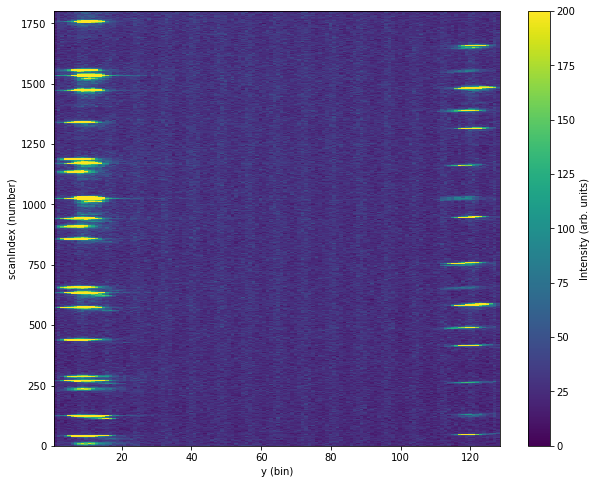

In [30]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(data_slice, vmax=200, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

In [10]:
hk0_slice = IntegrateMDHistoWorkspace('data',P1Bin=[0,20])

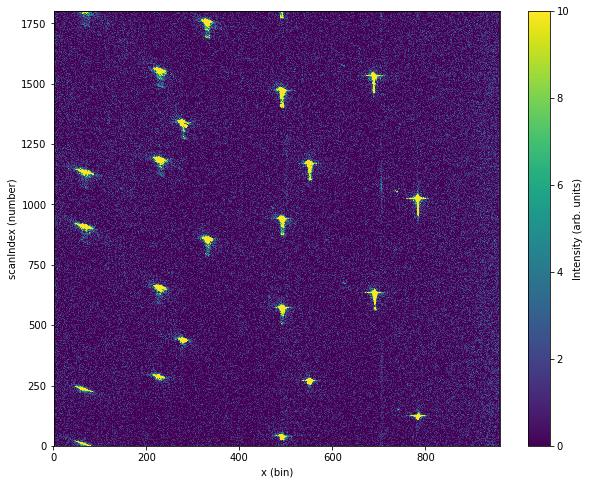

In [31]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(hk0_slice, vmax=10, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

In [13]:
hk1_slice = IntegrateMDHistoWorkspace('data',P1Bin=[108,128])

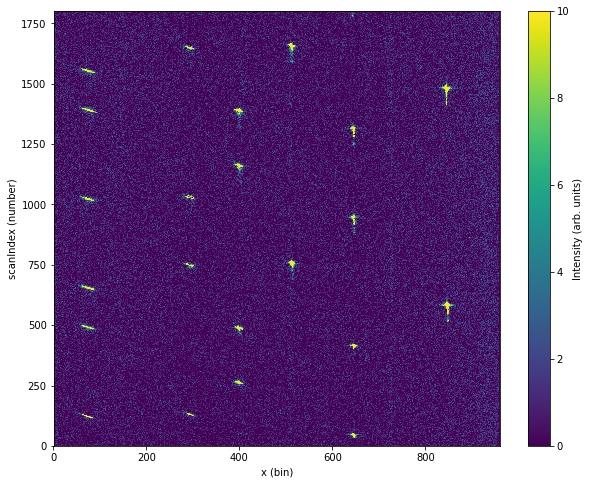

In [32]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(hk1_slice, vmax=10, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

#### Convert the data to Q space

In [46]:
ConvertWANDSCDtoQ(InputWorkspace='data',
                  NormalisationWorkspace='norm',
                  OutputWorkspace='Q',
                  BinningDim1='-2.02,1.02,76')

MDHistoWorkspace
Title: 
Dim 0: (Q_sample_x) -8.02 to 8.02 in 401 bins
Dim 1: (Q_sample_y) -2.02 to 1.02 in 76 bins
Dim 2: (Q_sample_z) -8.02 to 8.02 in 401 bins

Inelastic: ki-kf
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: /HFIR/HB2C/IPTS-7776/nexus/HB2C_27976.nxs.h5

Parameters from: /home/rwp/mantid/instrument/WAND_Parameters.xml
Run start: 2018-May-07 22:24:49
Run end:  not available
Sample: a 6.3, b 6.3, c 6.3; alpha 90, beta 90, gamma 90


In [57]:
Q_0 = IntegrateMDHistoWorkspace('Q',P2Bin=[-0.04,0.04])

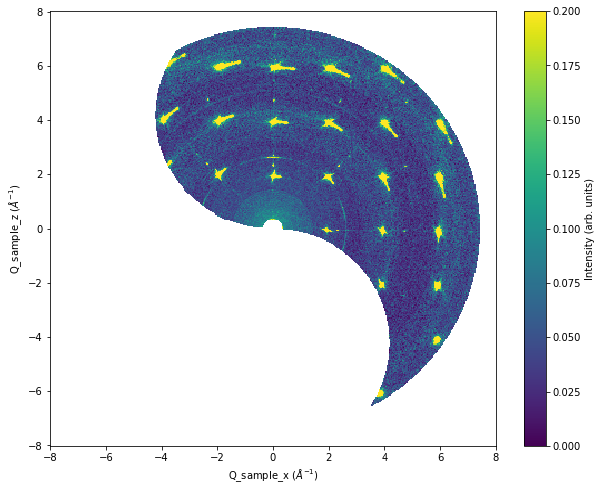

In [76]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(mtd['Q_0'], vmax=0.2, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

In [74]:
Q_1 = IntegrateMDHistoWorkspace('Q',P2Bin=[-1.02,-0.94])

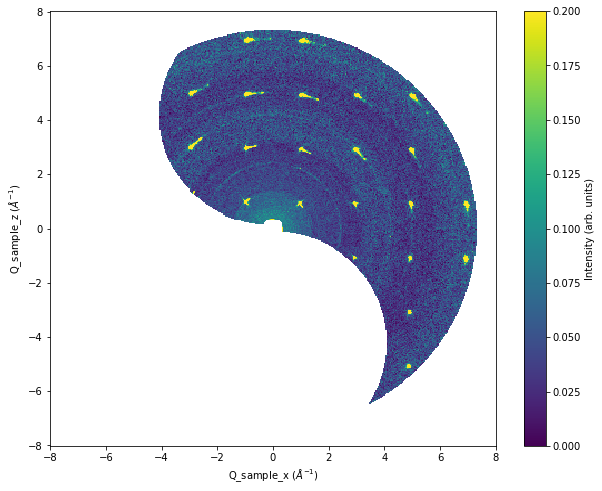

In [75]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(mtd['Q_1'], vmax=0.2, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

#### Set UB and convert to HKL

If you used the sample alignment tool then the UB will already be on the workspace and you dont need to set it

In [9]:
SetUB('data', UB='0,0.1770619741,-0.00927942487,0.177304965,0,0,0,-0.00927942487,-0.177061974')
ConvertWANDSCDtoQ(InputWorkspace='data',
                  NormalisationWorkspace='norm',
                  OutputWorkspace='HKL',
                  Frame='HKL',
                  BinningDim0='-1,1,1',
                  BinningDim1='-2.02,7.02,226',
                  BinningDim2='-6.52,2.52,226')

MDHistoWorkspace
Title: 
Dim 0: ([H,0,0]) -1 to 1 in 1 bins
Dim 1: ([0,K,0]) -2.02 to 7.02 in 226 bins
Dim 2: ([0,0,L]) -6.52 to 2.52 in 226 bins

Inelastic: ki-kf
Instrument: WAND (2018-Apr-01 to 2100-Jan-31)Instrument from: /opt/mantidnightly/instrument/WAND_Definition_2018_04_01.xml

Parameters from: /opt/mantidnightly/instrument/WAND_Parameters.xml
Run start: 2018-May-02 13:34:10
Run end:  not available
Sample: a 5.6, b 5.6, c 5.6; alpha 90, beta 90, gamma 90


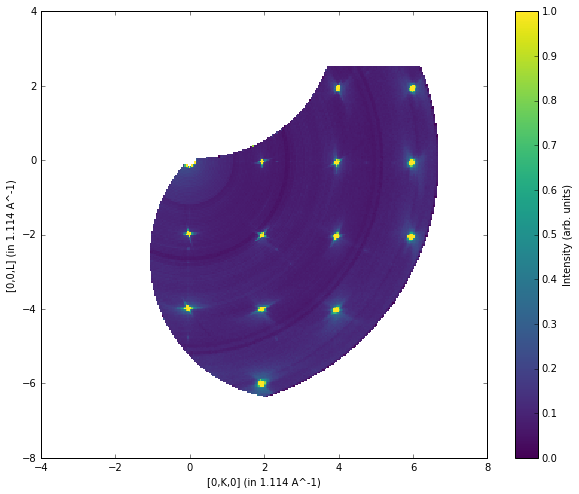

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
c = ax.pcolormesh(mtd['HKL'], vmax=1, cmap='viridis')
cbar=fig.colorbar(c)
cbar.set_label('Intensity (arb. units)')

## See also

* [LoadWANDSCD](http://docs.mantidproject.org/nightly/algorithms/LoadWANDSCD.html)
* [ConvertWANDSCDtoQ](http://docs.mantidproject.org/nightly/algorithms/ConvertWANDSCDtoQ.html)
* [IntegrateMDHistoWorkspace](http://docs.mantidproject.org/nightly/algorithms/IntegrateMDHistoWorkspace.html)
* [Introduction to Matplotlib in Mantid](http://docs.mantidproject.org/nightly/plotting/)
* [mantid.plots](http://docs.mantidproject.org/nightly/api/python/mantid/plots/)